In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [179]:
df = pd.read_csv("/Users/kohziyang/Documents/project/StudentsPerformance.csv")
df

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,PE_score
0,female,group B,bachelor's degree,standard,none,72,72,74,27
1,female,group C,some college,standard,completed,69,90,88,43
2,female,group B,master's degree,standard,none,90,95,93,18
3,male,group A,associate's degree,free/reduced,none,47,57,44,61
4,male,group C,some college,standard,none,76,78,75,48
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,21
996,male,group C,high school,free/reduced,none,62,55,55,55
997,female,group C,high school,free/reduced,completed,59,71,65,47
998,female,group D,some college,standard,completed,68,78,77,49


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
 8   PE_score                     1000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [181]:
df.describe()

,math_score,reading_score,writing_score,PE_score
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,43.527000
std,15.16308,14.600192,15.195657,13.762655
min,0.00000,17.000000,10.000000,14.000000
25%,57.00000,59.000000,57.750000,34.000000
50%,66.00000,70.000000,69.000000,43.000000
75%,77.00000,79.000000,79.000000,53.000000
max,100.00000,100.000000,100.000000,85.000000


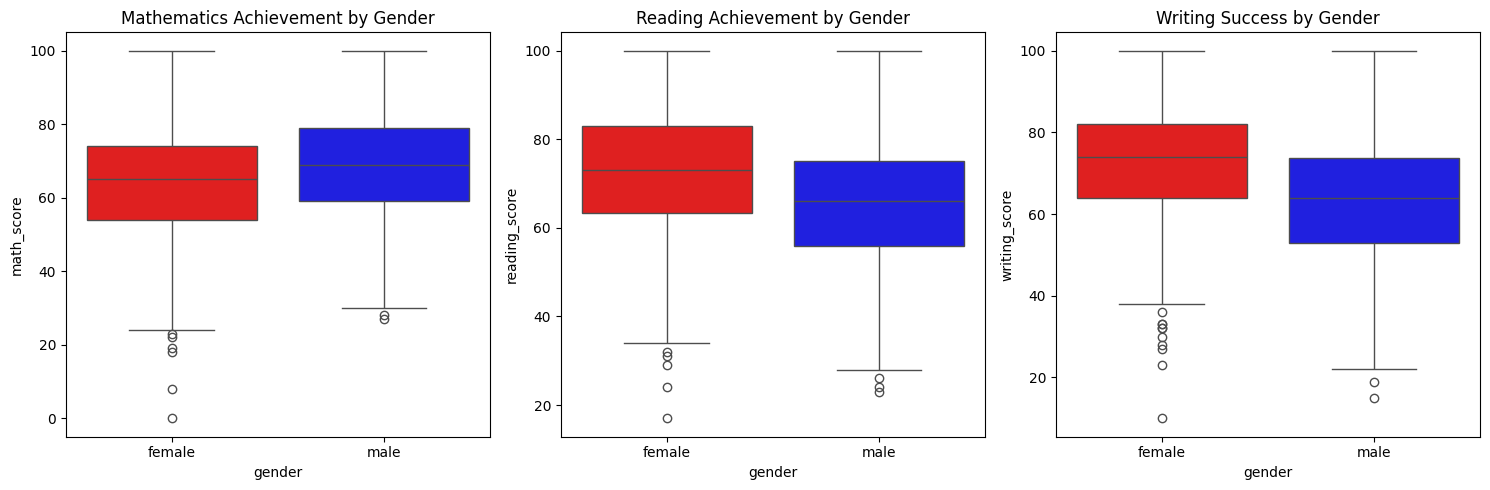

In [182]:
plt.figure(figsize=(15, 5))
pal = {gender : "red" if gender == "female" else "blue" for gender in df["gender"]}


plt.subplot(1,3,1)
sns.boxplot(x='gender', y='math_score', data=df, palette = pal)
plt.title('Mathematics Achievement by Gender')

plt.subplot(1, 3, 2)
sns.boxplot(x='gender', y='reading_score', data=df, palette= pal)
plt.title('Reading Achievement by Gender')

plt.subplot(1,3,3)
sns.boxplot(x='gender', y='writing_score', data=df, palette = pal)
plt.title('Writing Success by Gender')

plt.tight_layout()
plt.show()


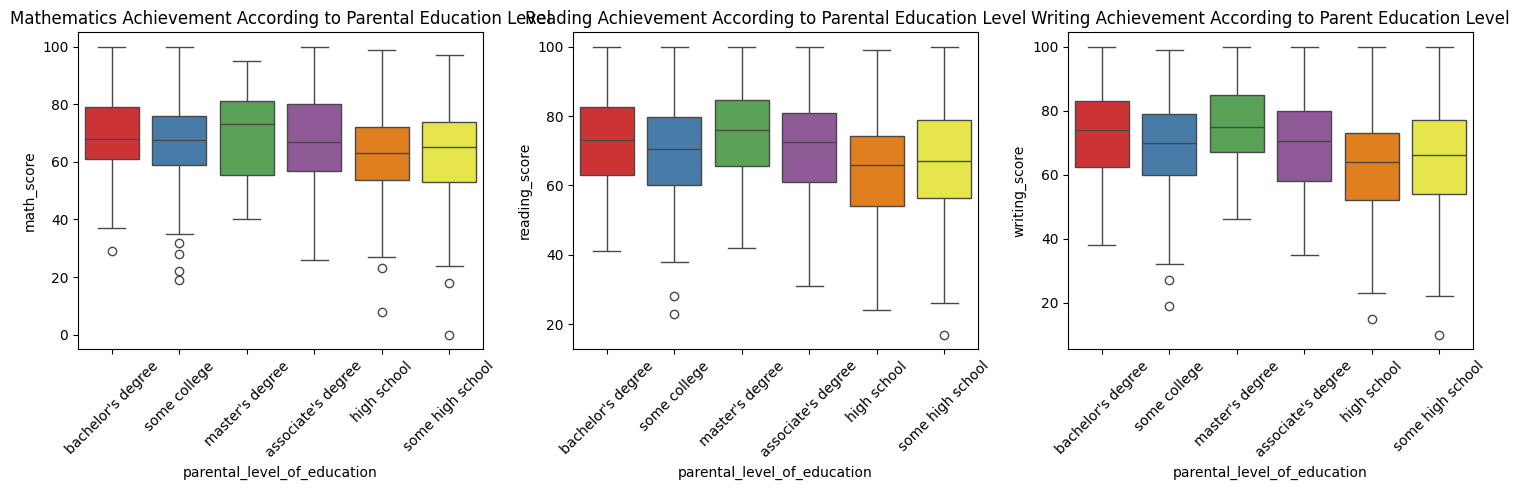

In [183]:
plt.figure(figsize=(15, 5))


plt.subplot(1, 3, 1)
sns.boxplot(x='parental_level_of_education', y='math_score', data=df, palette= "Set1")
plt.title('Mathematics Achievement According to Parental Education Level')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
sns.boxplot(x='parental_level_of_education', y='reading_score', data=df, palette= "Set1")
plt.title('Reading Achievement According to Parental Education Level')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
sns.boxplot(x='parental_level_of_education', y='writing_score', data=df, palette= "Set1")
plt.title('Writing Achievement According to Parent Education Level')
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

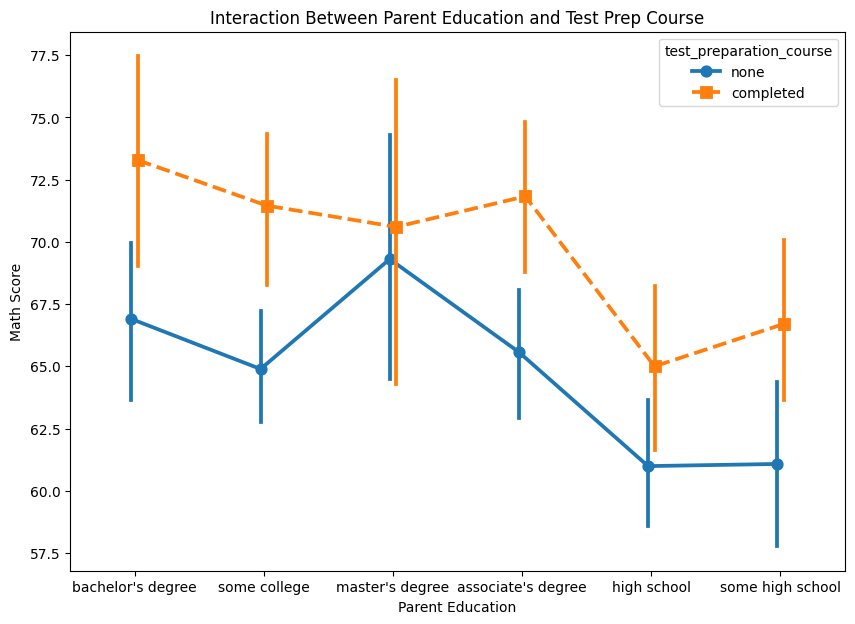

In [184]:
plt.figure(figsize=(10, 7))
sns.pointplot(x='parental_level_of_education', y='math_score', hue='test_preparation_course', data=df, 
              dodge=True, markers=["o", "s"], linestyles=["-", "--"])
plt.title('Interaction Between Parent Education and Test Prep Course')
plt.xlabel('Parent Education')
plt.ylabel('Math Score')
plt.show()

In [185]:
import statsmodels.formula.api as smf


model = smf.ols(formula = "math_score ~ C(parental_level_of_education) + C(test_preparation_course)", data = df)
result = model.fit()
print(model.fit().summary())


                            OLS Regression Results                            
Dep. Variable:             math_score   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     10.96
Date:                Sat, 11 Jan 2025   Prob (F-statistic):           7.54e-12
Time:                        22:05:38   Log-Likelihood:                -4105.2
No. Observations:                1000   AIC:                             8224.
Df Residuals:                     993   BIC:                             8259.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

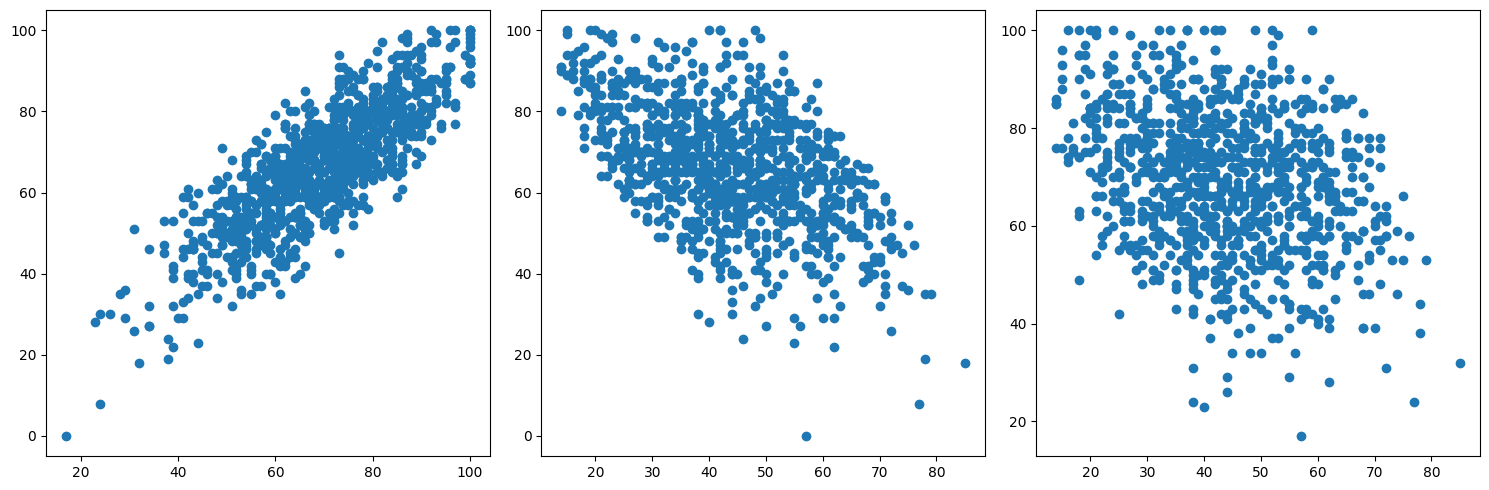

In [186]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(df["reading_score"], df["math_score"])

plt.subplot(1, 3, 2)
plt.scatter(df["PE_score"], df["math_score"])

plt.subplot(1, 3, 3)
plt.scatter(df["PE_score"], df["reading_score"])

plt.tight_layout()
plt.show()

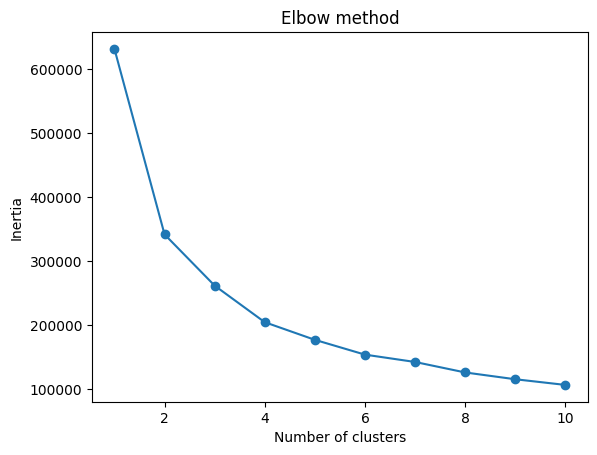

In [187]:
from sklearn.cluster import KMeans

x = df.iloc[:, [5,6,8]]
after = pd.get_dummies(x)

inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++', random_state=42)
    kmeans.fit(pd.get_dummies(after))
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [188]:
k_means_optimum = KMeans(n_clusters = 2, init = 'k-means++',  random_state=42)
y = k_means_optimum.fit_predict(after)

df['cluster'] = y  
print(df.head())

   gender race/ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  PE_score  \
0                    none          72             72             74        27   
1               completed          69             90             88        43   
2                    none          90             95             93        18   
3                    none          47             57             44        61   
4                    none          76             78             75        48   

   cluster  
0        1  
1        1  
2        1  
3        0  
4        1  


In [189]:
from sklearn.metrics import silhouette_score
score = silhouette_score(after,y)
print(score)

0.37246131591057197


In [190]:


data1 = df[df.cluster==0]
data2 = df[df.cluster==1]

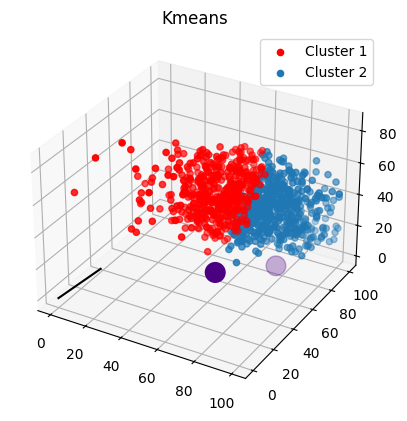

In [191]:
kplot = plt.axes(projection='3d')
xline = np.linspace(0, 15, 1000)
yline = np.linspace(0, 15, 1000)
zline = np.linspace(0, 15, 1000)
kplot.plot3D(xline, yline, zline, 'black')
# Data for three-dimensional scattered points
kplot.scatter3D(data1.math_score, data1.reading_score, data1.PE_score, c='red', label = 'Cluster 1')
kplot.scatter3D(data2.math_score, data2.reading_score, data2.PE_score, label = 'Cluster 2')
plt.scatter(k_means_optimum.cluster_centers_[:,0], k_means_optimum.cluster_centers_[:,1], color = 'indigo', s = 200)
plt.legend()
plt.title("Kmeans")
plt.show()